---

# Ensembles of models

In this assignment, we will consider the application of some classical and well-proven ensemble algorithms. We will demonstrate the work of these algorithms using electricity consumption dataset.

# Dataset description

**Author**: M. Harries, J. Gama, A. Bifet  
**Source**: [Joao Gama](http://www.inescporto.pt/~jgama/ales/ales_5.html) - 2009  
**Please cite**: None  

**Electricity** is a widely used dataset described by M. Harries and analyzed by J. Gama (see papers below). This data was collected from the Australian New South Wales Electricity Market. In this market, prices are not fixed and are affected by demand and supply of the market. They are set every five minutes. Electricity transfers to/from the neighboring state of Victoria were done to alleviate fluctuations.

The dataset (originally named ELEC2) contains 45,312 instances dated from 7 May 1996 to 5 December 1998. Each example of the dataset refers to a period of 30 minutes, i.e. there are 48 instances for each time period of one day. Each example on the dataset has 5 fields, the day of week, the time stamp, the New South Wales electricity demand, the Victoria electricity demand, the scheduled electricity transfer between states and the class label. The class label identifies the change of the price (UP or DOWN) in New South Wales relative to a moving average of the last 24 hours (and removes the impact of longer term price trends). 

The data was normalized by A. Bifet.

### Attribute information  
* Date: date between 7 May 1996 to 5 December 1998. Here normalized between 0 and 1
* Day: day of the week (1-7)
* Period: time of the measurement (1-48) in half hour intervals over 24 hours. Here normalized between 0 and 1
* NSWprice: New South Wales electricity price, normalized between 0 and 1
* NSWdemand: New South Wales electricity demand, normalized between 0 and 1
* VICprice: Victoria electricity price, normalized between 0 and 1
* VICdemand: Victoria electricity demand, normalized between 0 and 1
* transfer: scheduled electricity transfer between both states, normalized between 0 and 1

### Relevant papers  
M. Harries. Splice-2 comparative evaluation: Electricity pricing. Technical report, The University of South Wales, 1999.  
J. Gama, P. Medas, G. Castillo, and P. Rodrigues. Learning with drift detection. In SBIA Brazilian Symposium on Artificial Intelligence, pages 286–295, 2004.

# Exploratory data analysis

Read the dataset into a dataframe

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# < ENTER YOUR CODE HERE > 
df = pd.read_csv('/Users/lune/Education/Machine learning/Ensemble/electricity_train.csv')

Use the <code>.describe()</code> method to explore the dataset "from a bird's eye view".

In [3]:
# < ENTER YOUR CODE HERE > 
df.describe()

,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
count,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000,36249.000000
mean,0.498293,4.006566,0.500560,0.057828,0.425939,0.003455,0.423024,0.500243,0.424536
std,0.339907,1.993551,0.294998,0.039052,0.163390,0.010175,0.120600,0.153098,0.494279
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031945,2.000000,0.255319,0.035187,0.309729,0.002283,0.373382,0.414912,0.000000
50%,0.456263,4.000000,0.510638,0.048787,0.444213,0.003467,0.422915,0.414912,0.000000
75%,0.880492,6.000000,0.765957,0.074457,0.536745,0.003467,0.468669,0.605263,1.000000
max,1.000000,7.000000,1.000000,1.000000,0.980809,1.000000,1.000000,0.959211,1.000000


Make sure there are no missing values. It makes sense to check the balance of classes. Enter the proportion of elements of the class $1$.

In [5]:
# < ENTER YOUR CODE HERE > 
df.isnull().sum()

date         0
day          0
period       0
nswprice     0
nswdemand    0
vicprice     0
vicdemand    0
transfer     0
class        0
dtype: int64

In [12]:
round(df['class'].value_counts(normalize=True)[1],3)

0.425

Construct a correlation matrix. Identify the pair of most correlated features.

<Axes: >

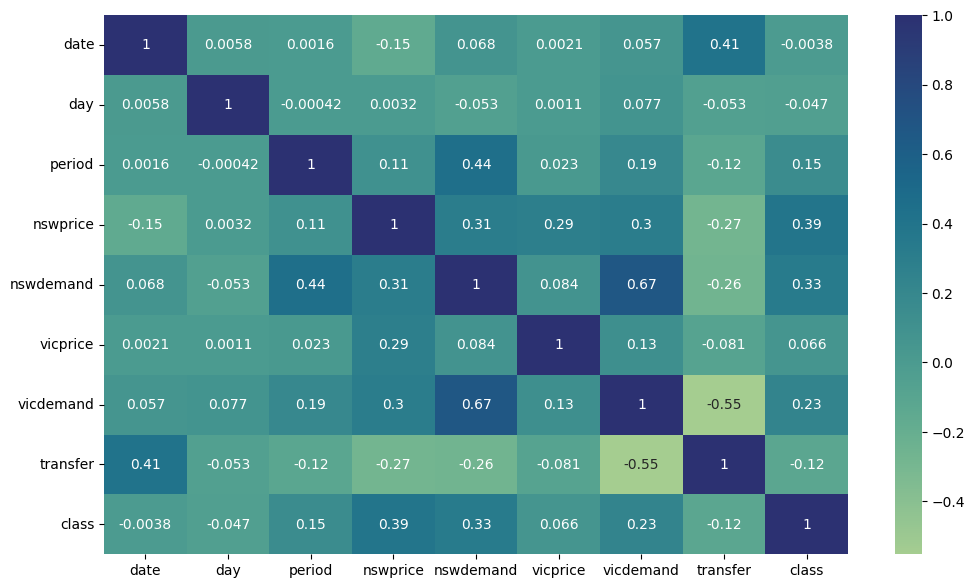

In [16]:
# < ENTER YOUR CODE HERE > 
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True, cmap='crest')

In [23]:
df.corr().abs().unstack().sort_values(ascending=False)[df.corr().abs().unstack().sort_values(ascending=False)<1]

vicdemand  nswdemand    0.667174
nswdemand  vicdemand    0.667174
transfer   vicdemand    0.552870
vicdemand  transfer     0.552870
period     nswdemand    0.444579
                          ...   
           date         0.001577
vicprice   day          0.001082
day        vicprice     0.001082
           period       0.000416
period     day          0.000416
Length: 72, dtype: float64

Construct histograms of the distributions of the features.

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'period'}>],
       [<Axes: title={'center': 'nswprice'}>,
        <Axes: title={'center': 'nswdemand'}>,
        <Axes: title={'center': 'vicprice'}>],
       [<Axes: title={'center': 'vicdemand'}>,
        <Axes: title={'center': 'transfer'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

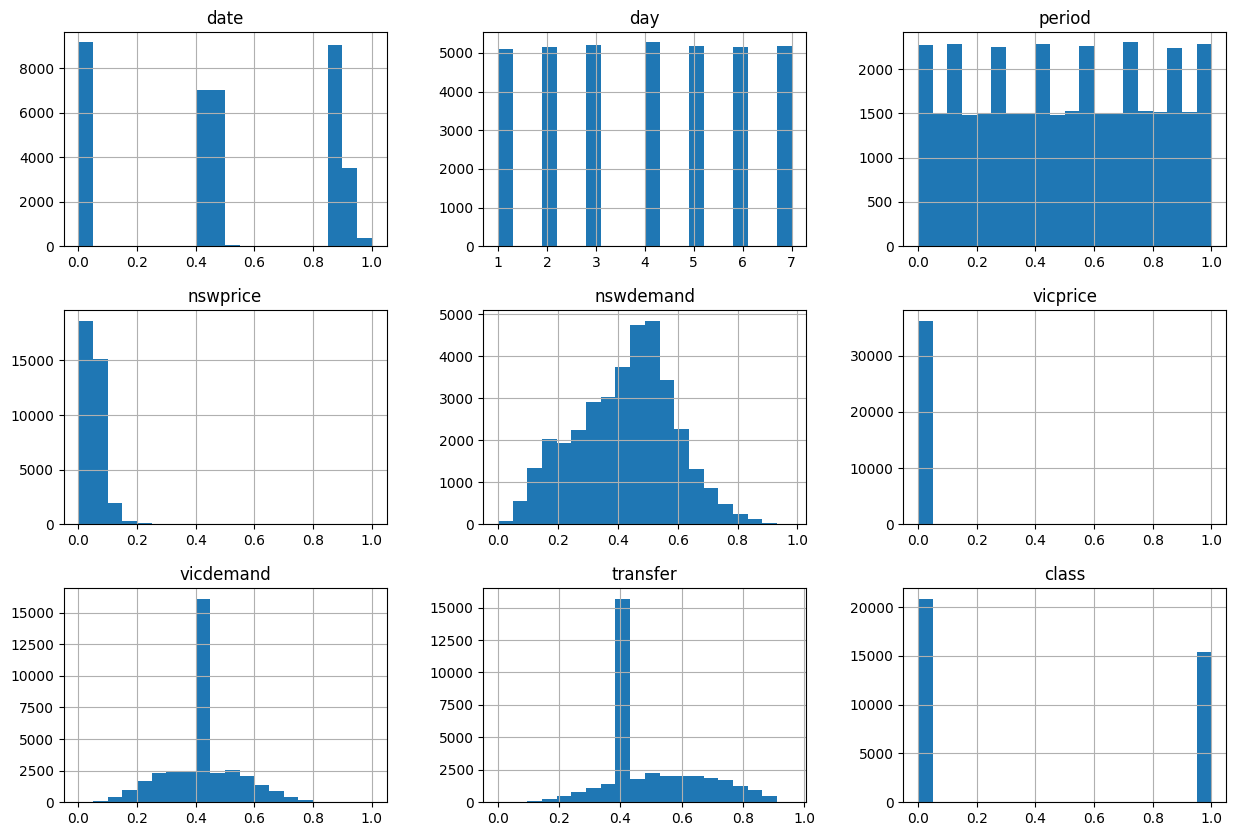

In [26]:
df.hist(bins=20, figsize=(15,10))

From the resulting illustrations, we can see that there is probably some periodicity in the data, as expected. Moreover, it seems that the missing values and outlier processing has already been done for us.

Use <code>train_test_split</code> to split the resulting dataset into training and test samples with the parameters specified in your individual assignment.

In [27]:
from sklearn.model_selection import train_test_split

In [30]:
# < ENTER YOUR CODE HERE > 
train_data, test_data = train_test_split(df, test_size=0.2, random_state=25)

X_train = train_data.drop(columns = 'class')
y_train = train_data['class']
X_test = test_data.drop(columns = 'class')
y_test = test_data['class']

# Random Forests Classifier

Train the <code>sklearn.ensemble.RandomForestClassifier</code> model on the training dataset with the parameters specified in your individual assignment.

In [35]:
# < ENTER YOUR CODE HERE > 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=25)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

Build the <code>classification_report</code> of the resulting model on **training dataset**. Enter the accuracy of the model on the **training dataset**.

In [37]:
# < ENTER YOUR CODE HERE > 
from sklearn.metrics import accuracy_score

round(accuracy_score(y_train, y_train_pred),3)

1.0

We got overfitting. Well, once again, we can answer that decision trees are quite prone to overtraining.

## Adding GridSearchCV to the Random Forest.

Using the <code>sklearn.model_selection.GridSearchCV</code>, train <code>RandomForestClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [38]:
# < ENTER YOUR CODE HERE > 
from sklearn.model_selection import GridSearchCV

tuned_parameters = {'n_estimators': [100,300,500],
  'max_leaf_nodes': list(range(6,10)),
  'min_samples_leaf': [1,2,3]}

cv = GridSearchCV(RandomForestClassifier(
    bootstrap=False,
    class_weight='balanced',
    n_jobs=-1,
    max_features='sqrt',
    random_state=25),
    tuned_parameters,
    verbose=4,
    cv=3)

cv.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.778 total time=   0.3s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.767 total time=   0.2s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=100;, score=0.780 total time=   0.2s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.777 total time=   0.5s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.767 total time=   0.6s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=300;, score=0.779 total time=   0.5s
[CV 1/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.776 total time=   0.8s
[CV 2/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.767 total time=   0.8s
[CV 3/3] END max_leaf_nodes=6, min_samples_leaf=1, n_estimators=500;, score=0.780 total time=   0.9s
[CV 1/3] END max_leaf_nodes=6

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              n_jobs=-1, random_state=25),
             param_grid={'max_leaf_nodes': [6, 7, 8, 9],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             verbose=4)

Select the best model. We recommend using the field <code>best_estimator_</code> of the <code>grid_search</code> class object. We can find the parameters of the best model in the field <code>best_params_</code> of this object.

In [61]:
# < ENTER YOUR CODE HERE > 
cv.best_params_

{'max_leaf_nodes': 9, 'min_samples_leaf': 1, 'n_estimators': 100}

Build the <code>classification_report</code> of the resulting model on the **training dataset**.
Enter the model accuracy on the **training dataset**.

In [66]:
# < ENTER YOUR CODE HERE > 
model = cv.best_estimator_
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
round(accuracy_score(y_train, y_train_pred),3)

0.794

Build the <code>classification_report</code> of the resulting model on the **test dataset**.
Enter the model accuracy on the **test dataset**.

In [65]:
# < ENTER YOUR CODE HERE > 
y_test_pred = model.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.789

Overfitting has been avoided, but accuracy seems low.

One of the advantages of random forest is that you can look at the importance of features when classifying (inverse problem). Importance values can be found in the field <code>feature_importances_</code> of the model. Identify the name of the most important feature of the model.

In [45]:
# < ENTER YOUR CODE HERE > 
model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df 

,Feature,Importance
3,nswprice,0.466512
5,vicprice,0.202012
4,nswdemand,0.128985
2,period,0.088059
0,date,0.057456
6,vicdemand,0.030493
1,day,0.017347
7,transfer,0.009137


Let's try to improve the results by using other types of ensembles.

# Voting Classifier

Trains all models given as input and predicts the final result either by the greater number of identical answers that the models gave (hard), or calculates the probability of assigning objects to classes across all models and takes argmax.

Use an <code>sklearn.ensemble.VotingClassifier</code> object with the parameter <code>voting='hard'</code>. Use classifiers with the appropriate parameters specified in your individual assignment as base algorithms. Train the model on the training dataset.

In [46]:
# < ENTER YOUR CODE HERE > 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

model_log = LogisticRegression(solver='liblinear', random_state=25)
model_svm = SVC(random_state=25)
model_sgd = SGDClassifier(random_state=25)

vot = VotingClassifier(

    estimators=[('log_reg', model_log),
                ('svc', model_svm),
                ('sgd', model_sgd)],
                voting = 'hard'
)

vot.fit(X_train, y_train)

VotingClassifier(estimators=[('log_reg',
                              LogisticRegression(random_state=25,
                                                 solver='liblinear')),
                             ('svc', SVC(random_state=25)),
                             ('sgd', SGDClassifier(random_state=25))])

Enter the model accuracy on the **training dataset**.

In [47]:
# < ENTER YOUR CODE HERE > 
y_train_pred = vot.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.753

Enter the model accuracy on the **test dataset**.

In [48]:
# < ENTER YOUR CODE HERE > 
y_test_pred = vot.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.75

# Bagging Classifier

Creates multiple objects of the same class (multiple models) and trains them on non-overlapping subsets of the training dataset, and further averages the predictions.

Based on <code>sklearn.ensemble.BaggingClassifier</code>, using <code>DecisionTreeClassifier</code> train the model on the training dataset with the parameters specified in your individual assignment.

In [49]:
# < ENTER YOUR CODE HERE > 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag = BaggingClassifier(
    DecisionTreeClassifier(class_weight='balanced'),
    max_samples=0.5, 
    max_features=0.5,
    bootstrap=False,
    random_state=25)

bag.fit(X_train, y_train)

BaggingClassifier(bootstrap=False,
                  estimator=DecisionTreeClassifier(class_weight='balanced'),
                  max_features=0.5, max_samples=0.5, random_state=25)

Enter the model accuracy on the **training dataset**.

In [50]:
# < ENTER YOUR CODE HERE > 
y_train_pred = bag.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9802406979551019

Enter the model accuracy on the **test dataset**.

In [51]:
# < ENTER YOUR CODE HERE > 
y_test_pred = bag.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.846

# Gradient Boosting Classifier

Gradient boosting works like this: several objects of a class (several models) are created, they are chained so that each next one tries to correct the errors of the previous one. Prone to overlearning.

Train a model based on <code>sklearn.ensemble.GradientBoostingClassifier</code> on training dataset with the parameters specified in your individual assignment.

In [52]:
# < ENTER YOUR CODE HERE > 
from sklearn.ensemble import GradientBoostingClassifier

g_boost = GradientBoostingClassifier(
    n_estimators=500, learning_rate=0.8, random_state=25, max_depth=2
)

g_boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, max_depth=2, n_estimators=500,
                           random_state=25)

Enter the model accuracy on the **training dataset**.

In [53]:
# < ENTER YOUR CODE HERE > 
y_train_pred = g_boost.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9319976550915549

Enter the model accuracy on the **test dataset**.

In [54]:
# < ENTER YOUR CODE HERE > 
y_test_pred = g_boost.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.894

# AdaBoost Classifier

It works in a similar way to gradient boosting, however subsequent models do not try to correct the error of the previous ones: the first object is trained on the entire dataset, and the next one updates its weights based on the experience of the previous one in a way that corrects erroneous predictions.

Based on <code>sklearn.ensemble.AdaBoostClassifier</code>, using <code>DecisionTreeClassifier</code>, train the model with the parameters specified in your individual assignment on the training dataset.

In [55]:
# < ENTER YOUR CODE HERE > 
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=3, class_weight='balanced'),
    n_estimators=300,
    learning_rate=0.5,
    random_state=25)

ada.fit(X_train, y_train)

/Users/lune/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=3),
                   learning_rate=0.5, n_estimators=300, random_state=25)

Enter the model accuracy on the **training dataset**.

In [56]:
# < ENTER YOUR CODE HERE > 
y_train_pred = ada.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.9415152246629194

Enter the model accuracy on the **test dataset**.

In [57]:
# < ENTER YOUR CODE HERE > 
y_test_pred = ada.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.896

# Stacking Classifier

Trains multiple class objects (multiple models) on the entire dataset, and then trains a separate classifier on the metdata - the predictions obtained by the previously trained models.

Use the <code>sklearn.ensemble.StackingClassifier</code> object. The basic algorithms and solver, as well as the corresponding parameters, are specified in your individual assignment. Train the model on the training dataset.

In [58]:
# < ENTER YOUR CODE HERE >
from sklearn.ensemble import StackingClassifier

base_est = [('rand_forest', RandomForestClassifier(random_state=25)),
        ('svc', SVC(random_state=25))]
final_est = LogisticRegression(random_state=25)

stack = StackingClassifier(estimators=base_est,
                           final_estimator=final_est)
stack.fit(X_train, y_train)

StackingClassifier(estimators=[('rand_forest',
                                RandomForestClassifier(random_state=25)),
                               ('svc', SVC(random_state=25))],
                   final_estimator=LogisticRegression(random_state=25))

Enter the model accuracy on the **training dataset**.

In [59]:
# < ENTER YOUR CODE HERE > 
y_train_pred = stack.predict(X_train)
accuracy_score(y_train, y_train_pred)

0.999689644470499

Enter the model accuracy on the **test dataset**.

In [60]:
# < ENTER YOUR CODE HERE > 
y_test_pred = stack.predict(X_test)
round(accuracy_score(y_test, y_test_pred),3)

0.895